In [4]:
%pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SK

In [12]:
#cargamos librerias
import numpy as np 
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score   
import pandas as pd 

In [33]:
#cargar archivo csv desde seaborn
#Convertir en dataframe
df= pd.read_csv("car_crashes.csv")
df.head(5)

,Unnamed: 0,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_ol

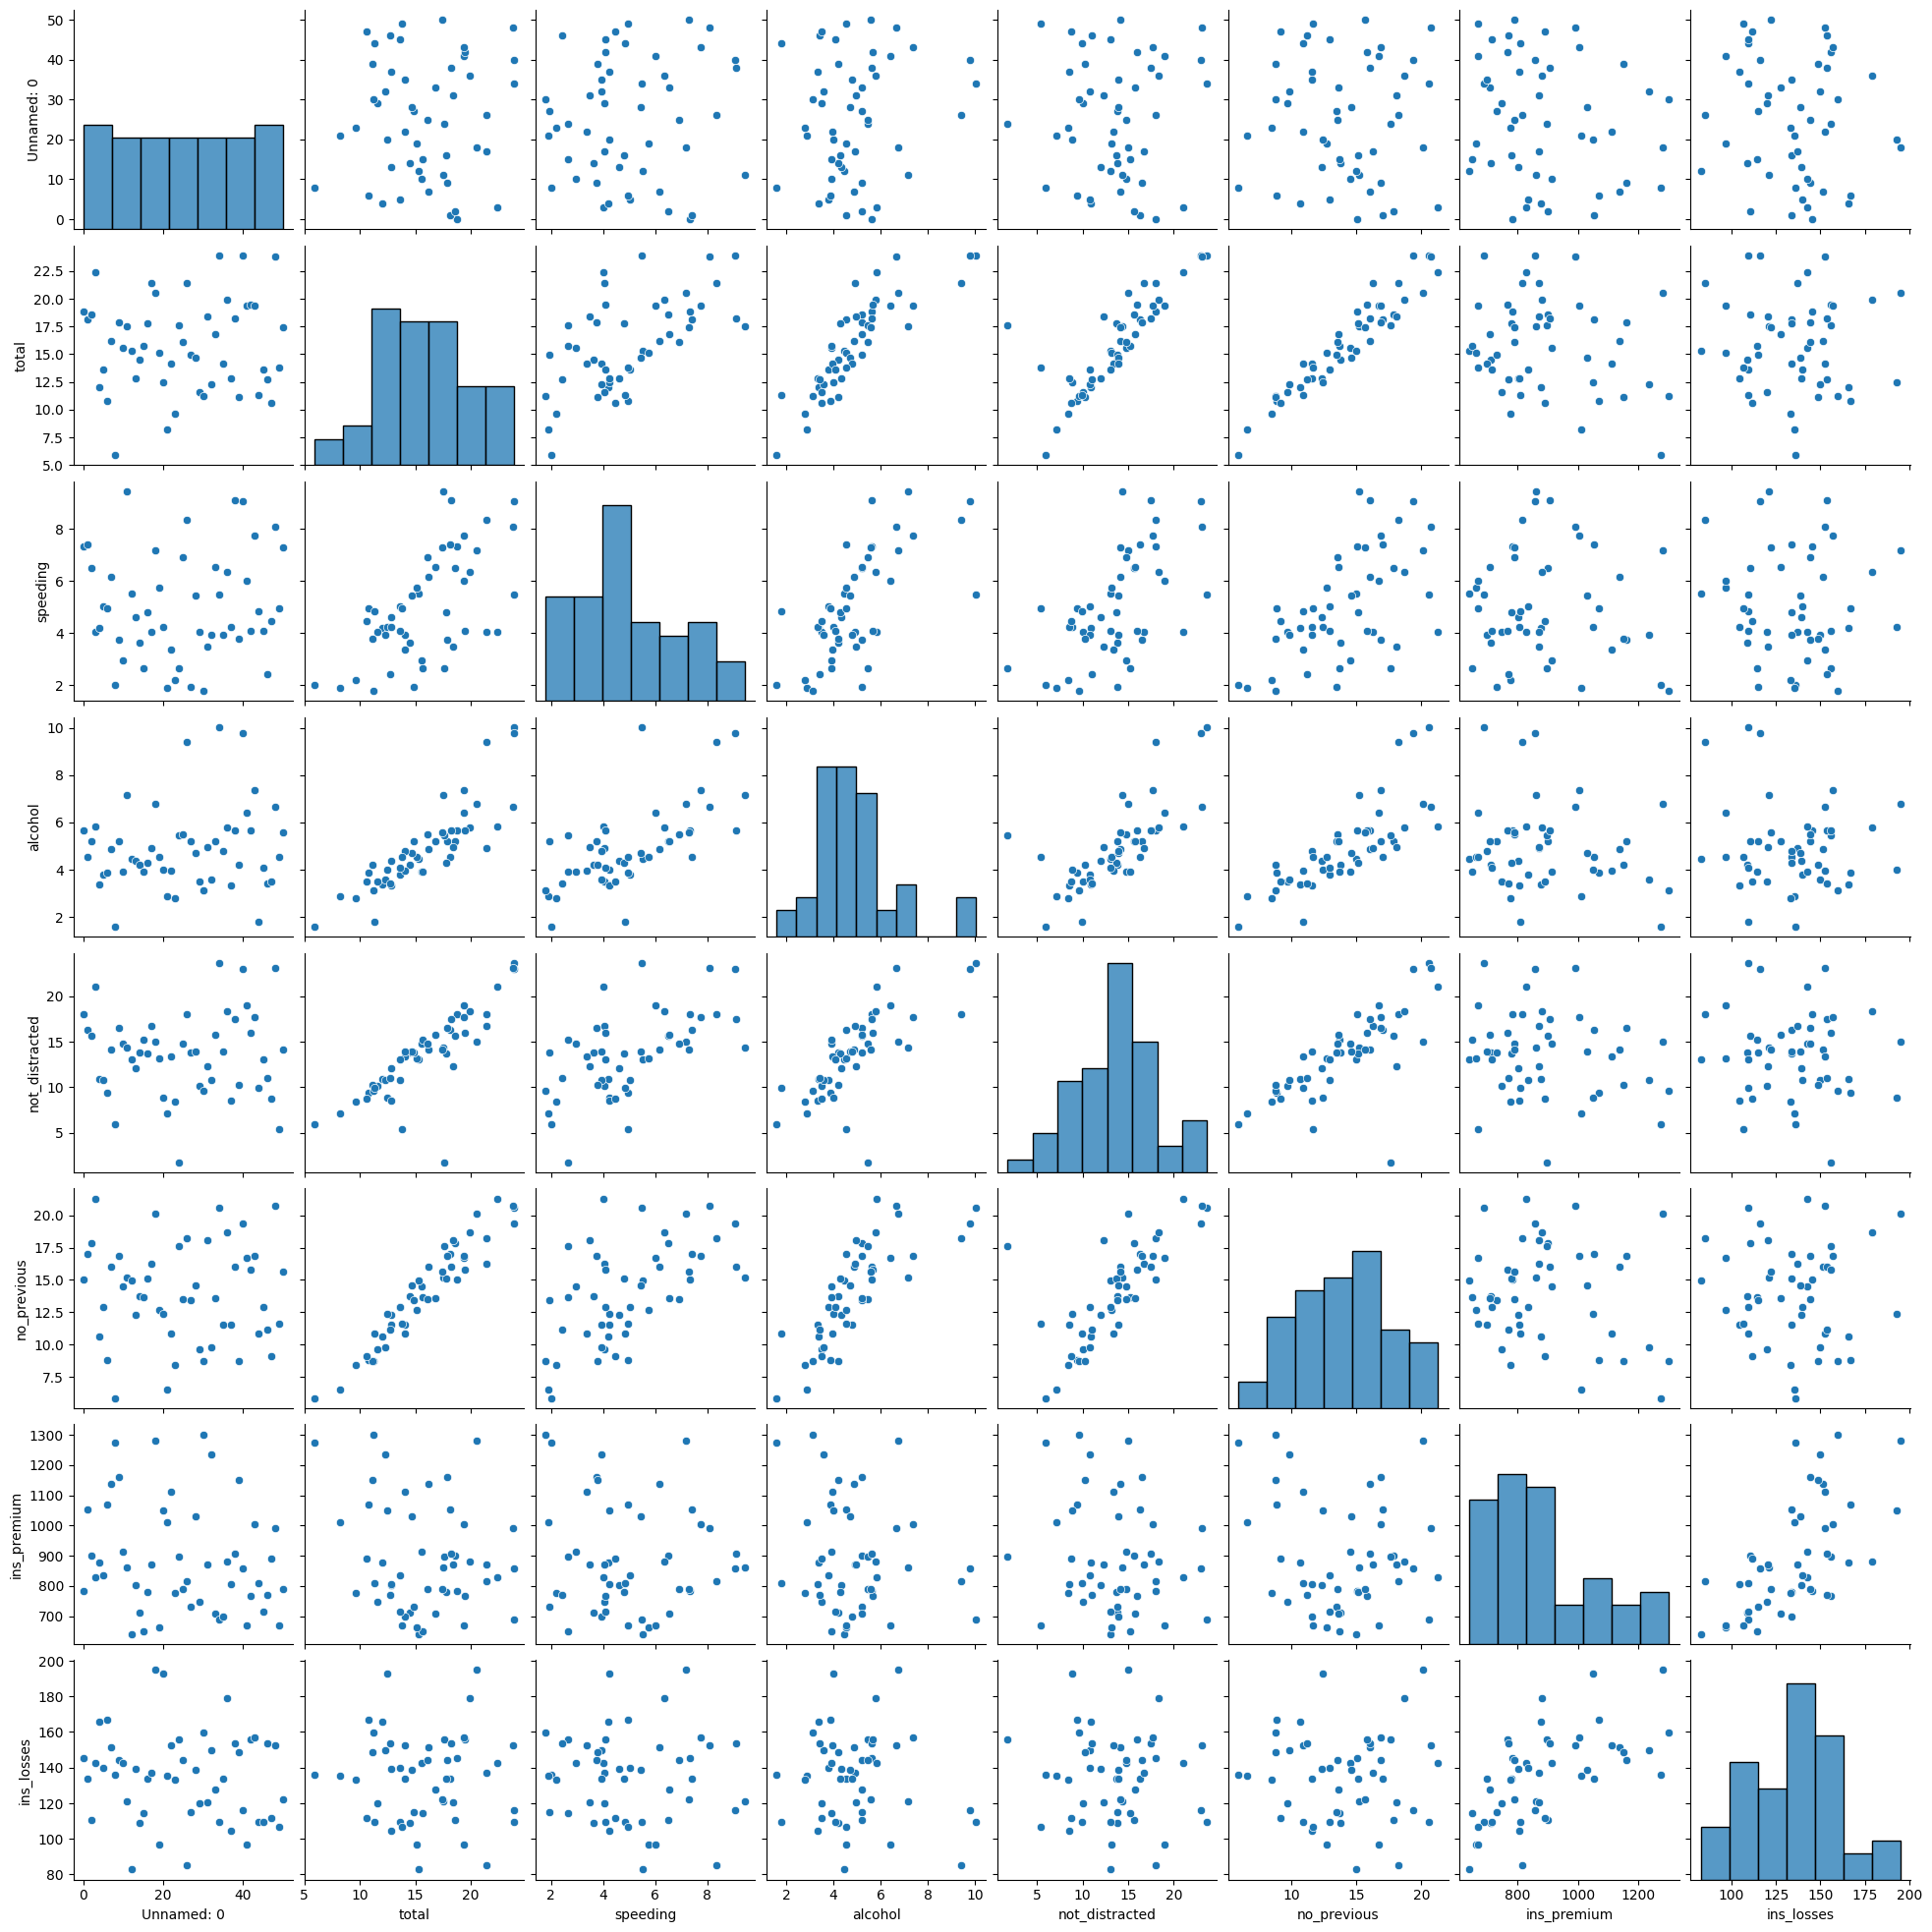

In [14]:
sns.pairplot(df)

In [17]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['ins_losses']]
Var_Dep= df['total']

In [18]:
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

** Usamos las siguientes ecuaciones como funciones de ajuste.**

        y = ax^2 + bx + c   ("Función cuadrática")

        y = a*exp(bx) + c   ("Función exponencial")

        y = 1/a*x           ("Función inversa")

        y = a*np.sin(x) + b ("Función senoidal")

        y = a*np.tan(x) + b ("Función tangencial")

        y = a*np.abs(x) + b*x + c (Función Valor absoluto)

        y = (a*x**2 + b)/ c*x (Función cociente entre polinomios)

        y = a*np.log(x) + b  (Función logaritmica)

        y = a*x + b*x + c*x (Función lineal con producto de coeficientes)

        y = 1/a*x**2  (Función cuadrática inversa)

        y = a/b*x**2 + c*x (Función polinomial inversa)

***MODELO 1***

In [19]:
def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

In [20]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df['ins_losses'], df['total'])

In [21]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([ 6.31404167e-04, -1.78288210e-01,  2.79658151e+01])

In [22]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, df['ins_losses'], df['total'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a * x ** 2 + b * x + c

In [23]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
#x= x.reshape(51, 1)
#y = y.reshape(51, 1)
#yfit1 = yfit1.reshape(51, 1)
yfit1

,ins_losses
0,15.389687
1,15.413326
2,15.980397
3,15.381021
4,15.757437
5,15.381127
6,15.801567
7,15.447037
8,15.396744
9,15.385770


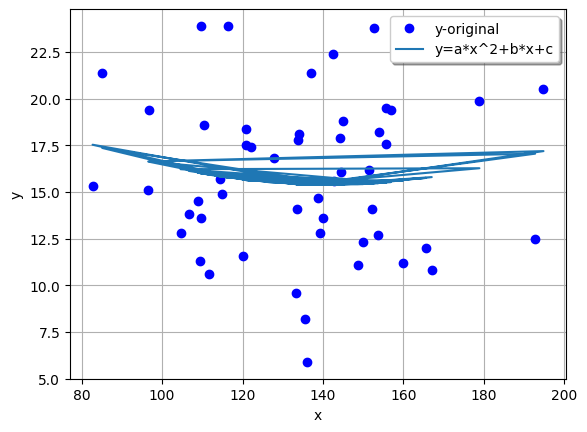

In [24]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [25]:
#Calculamos el coeficiente de determinación del modelo

R2 = r2_score(y, yfit1) 
R2

0.017528478101236922

***MODELO 2***

In [26]:
def func2(x, a, b, c):
    return a*np.exp(b*x)+c
    

In [27]:
#Ajustamos los parámetros de la función curve_fit
parametros2, covs2= curve_fit(func2, df['ins_losses'], df['total'])

/var/folders/b8/jg1xymvs3lsflq9qyj030f0m0000gp/T/ipykernel_38389/2800873776.py:2: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros2, covs2= curve_fit(func2, df['ins_losses'], df['total'])


In [28]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros2


array([-2.41481071e-14,  1.00000000e+00,  1.00000000e+00])

In [29]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros2, _ = curve_fit(func2, df['ins_losses'], df['total'])
a2, b2, c2 = parametros2[ 0 ], parametros2[ 1 ], parametros2[ 2 ]
yfit2 = a2*np.exp(x*b2)+c2

/var/folders/b8/jg1xymvs3lsflq9qyj030f0m0000gp/T/ipykernel_38389/337478338.py:2: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros2, _ = curve_fit(func2, df['ins_losses'], df['total'])


In [30]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
#yfit2 = yfit2.reshape(51, 1)
yfit2


,ins_losses
0,-2.456556e+49
1,-3.531370e+44
2,-2.028987e+34
3,-1.667533e+48
4,-2.065753e+58
5,-1.396446e+47
6,-8.293687e+58
7,-1.478466e+52
8,-2.942033e+45
9,-9.987611e+48


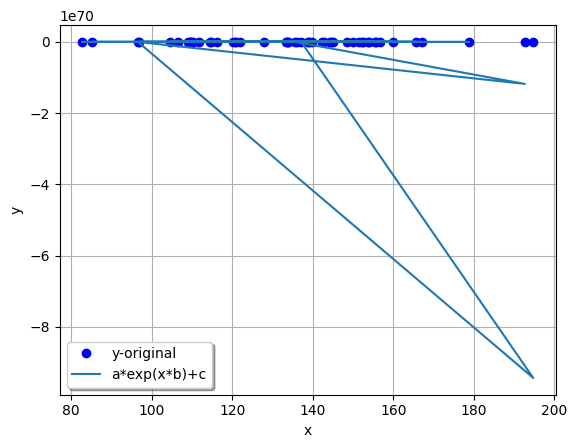

In [31]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit2, label="a*exp(x*b)+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [32]:
#Calculamos el coeficiente de determinación del modelo
R2 = r2_score(y, yfit2) 
R2

-1.0643008771758594e+139